In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kidney = pd.read_csv("kidney_disease.csv")

In [3]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
#age	-	age	
#bp	-	blood pressure 
#sg	-	specific gravity 
#al	- albumin 
#su	-	sugar 
#rbc	-	red blood cells 
#pc	-	pus cell 
#ba	-	bacteria 
#bgr	-	blood glucose random 
#sc	-	serum creatinine 
#pot	-	potassium 
#hemo	-	hemoglobin 
#wc	-	white blood cell count 
#rc	-	red blood cell count 
#htn	-	hypertension 
#dm	-	diabetes mellitus 
#cad	-	coronary artery disease 
#appet	-	appetite 
##ane	-	anemia 
#class	-	class
#pcc	-	pus cell clumps
#bu	-	blood urea
#sod	-	sodium
#pcv	-	packed cell volume 
#pe	-	pedal edema 

In [6]:
kidney.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [7]:
kidney.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


In [10]:
kidney = kidney.drop(['id'],axis=1)

In [11]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
kidney.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [13]:
kidney.shape

(400, 25)

In [14]:
kidney.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [15]:
from sklearn.preprocessing import Imputer
imp=Imputer()

In [16]:
kidney.iloc[:,0:1]=imp.fit_transform(kidney.iloc[:,0:1])
kidney.iloc[:,1:2]=imp.fit_transform(kidney.iloc[:,1:2])
kidney.iloc[:,2:3]=imp.fit_transform(kidney.iloc[:,2:3])
kidney.iloc[:,3:4]=imp.fit_transform(kidney.iloc[:,3:4])
kidney.iloc[:,4:5]=imp.fit_transform(kidney.iloc[:,4:5])
kidney.iloc[:,9:10]=imp.fit_transform(kidney.iloc[:,9:10])
kidney.iloc[:,10:11]=imp.fit_transform(kidney.iloc[:,10:11])
kidney.iloc[:,11:12]=imp.fit_transform(kidney.iloc[:,11:12])
kidney.iloc[:,12:13]=imp.fit_transform(kidney.iloc[:,12:13])
kidney.iloc[:,13:14]=imp.fit_transform(kidney.iloc[:,13:14])
kidney.iloc[:,14:15]=imp.fit_transform(kidney.iloc[:,14:15])

In [17]:
kidney.isnull().any()

age               False
bp                False
sg                False
al                False
su                False
rbc                True
pc                 True
pcc                True
ba                 True
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [18]:
kidney['rbc'].value_counts(dropna=False)
kidney['rbc'].fillna(value = 'normal',inplace = True)
kidney['rbc'].value_counts(dropna=False)

normal      353
abnormal     47
Name: rbc, dtype: int64

In [19]:
kidney['pc'].value_counts(dropna=False)
kidney['pc'].fillna(value = 'normal',inplace = True)
kidney['rbc'].value_counts(dropna=False)

normal      353
abnormal     47
Name: rbc, dtype: int64

In [20]:
kidney['pcc'].value_counts(dropna=False)
kidney['pcc'].fillna(value = 'notpresent',inplace = True)
kidney['pcc'].value_counts(dropna=False)

notpresent    358
present        42
Name: pcc, dtype: int64

In [21]:
kidney['ba'].value_counts(dropna=False)
kidney['ba'].fillna(value = 'notpresent',inplace = True)
kidney['ba'].value_counts(dropna=False)

notpresent    378
present        22
Name: ba, dtype: int64

In [22]:
kidney['pcv'].value_counts(dropna=False)
kidney['pcv'] = kidney['rc'].replace("\t?",np.NaN)
kidney.iloc[:,15:16]=imp.fit_transform(kidney.iloc[:,15:16])
kidney['pcv'].value_counts(dropna=False)

4.707435    131
5.200000     18
4.500000     16
4.900000     14
4.700000     11
3.900000     10
5.000000     10
4.800000     10
3.400000      9
4.600000      9
3.700000      8
5.900000      8
6.100000      8
5.500000      8
5.400000      7
5.300000      7
5.800000      7
3.800000      7
4.300000      6
4.000000      6
4.200000      6
5.600000      6
6.500000      5
5.700000      5
6.400000      5
5.100000      5
4.400000      5
3.200000      5
4.100000      5
6.200000      5
3.600000      4
6.300000      4
6.000000      4
3.300000      3
3.000000      3
3.500000      3
2.800000      2
2.100000      2
2.600000      2
2.900000      2
2.500000      2
2.700000      2
3.100000      2
2.400000      1
2.300000      1
8.000000      1
Name: pcv, dtype: int64

In [23]:
kidney['wc'].value_counts(dropna=False)
kidney['wc'] = kidney['rc'].replace("\t?",np.NaN)
kidney.iloc[:,16:17]=imp.fit_transform(kidney.iloc[:,16:17])
kidney['wc'].value_counts(dropna=False)

4.707435    131
5.200000     18
4.500000     16
4.900000     14
4.700000     11
3.900000     10
5.000000     10
4.800000     10
3.400000      9
4.600000      9
3.700000      8
5.900000      8
6.100000      8
5.500000      8
5.400000      7
5.300000      7
5.800000      7
3.800000      7
4.300000      6
4.000000      6
4.200000      6
5.600000      6
6.500000      5
5.700000      5
6.400000      5
5.100000      5
4.400000      5
3.200000      5
4.100000      5
6.200000      5
3.600000      4
6.300000      4
6.000000      4
3.300000      3
3.000000      3
3.500000      3
2.800000      2
2.100000      2
2.600000      2
2.900000      2
2.500000      2
2.700000      2
3.100000      2
2.400000      1
2.300000      1
8.000000      1
Name: wc, dtype: int64

In [24]:
#kidney['rc'].value_counts(dropna=False)
#count = 0
#count1 = 0
#for i in range(len(kidney)):
 #   try:
  #      kidney['rc'][i]=kidney['rc'][i].strip()
   #     print(type(kidney['rc'][i]))
    #    count +=1
    #except:
     #   count1+=1
    


In [25]:
#(count,count1)

In [26]:
kidney['rc'] = kidney['rc'].replace("\t?",np.NaN)
kidney.iloc[:,17:18]=imp.fit_transform(kidney.iloc[:,17:18])
kidney['rc'].value_counts(dropna=False)

4.707435    131
5.200000     18
4.500000     16
4.900000     14
4.700000     11
3.900000     10
5.000000     10
4.800000     10
3.400000      9
4.600000      9
3.700000      8
5.900000      8
6.100000      8
5.500000      8
5.400000      7
5.300000      7
5.800000      7
3.800000      7
4.300000      6
4.000000      6
4.200000      6
5.600000      6
6.500000      5
5.700000      5
6.400000      5
5.100000      5
4.400000      5
3.200000      5
4.100000      5
6.200000      5
3.600000      4
6.300000      4
6.000000      4
3.300000      3
3.000000      3
3.500000      3
2.800000      2
2.100000      2
2.600000      2
2.900000      2
2.500000      2
2.700000      2
3.100000      2
2.400000      1
2.300000      1
8.000000      1
Name: rc, dtype: int64

In [27]:
#rm_check = kidney['rc'].isin(["?"])
#kidney['rc'][rm_check]

In [44]:
#hello = kidney.iloc[162,18]
#type(hello)

In [29]:
kidney['htn'].value_counts(dropna=False)
kidney['htn'].fillna(value = 'no',inplace = True)
kidney['htn'].value_counts(dropna=False)

no     253
yes    147
Name: htn, dtype: int64

In [30]:
kidney['dm'] = kidney['dm'].replace("\tno",np.NaN)
kidney['dm'] = kidney['dm'].replace("\tyes",np.NaN)
kidney['dm'] = kidney['dm'].replace(" yes",np.NaN)
kidney['dm'].fillna(value = 'no',inplace = True)
kidney['dm'].value_counts(dropna=False)

no     266
yes    134
Name: dm, dtype: int64

In [31]:
kidney['cad'].value_counts(dropna=False)
kidney['cad'] = kidney['cad'].replace("\tno",np.NaN)
kidney['cad'].fillna(value = 'no',inplace = True)
kidney['cad'].value_counts(dropna=False)

no     366
yes     34
Name: cad, dtype: int64

In [32]:
kidney['rc'] = kidney['rc'].replace("\t",np.NaN)
kidney['rc'].fillna(value = 'no',inplace = True)
kidney['rc'].value_counts(dropna=False)

4.707435    131
5.200000     18
4.500000     16
4.900000     14
4.700000     11
3.900000     10
5.000000     10
4.800000     10
3.400000      9
4.600000      9
3.700000      8
5.900000      8
6.100000      8
5.500000      8
5.400000      7
5.300000      7
5.800000      7
3.800000      7
4.300000      6
4.000000      6
4.200000      6
5.600000      6
6.500000      5
5.700000      5
6.400000      5
5.100000      5
4.400000      5
3.200000      5
4.100000      5
6.200000      5
3.600000      4
6.300000      4
6.000000      4
3.300000      3
3.000000      3
3.500000      3
2.800000      2
2.100000      2
2.600000      2
2.900000      2
2.500000      2
2.700000      2
3.100000      2
2.400000      1
2.300000      1
8.000000      1
Name: rc, dtype: int64

In [33]:
kidney['appet'].value_counts(dropna=False)
kidney['appet'].fillna(value = 'good',inplace = True)
kidney['appet'].value_counts(dropna=False)

good    318
poor     82
Name: appet, dtype: int64

In [34]:
kidney['pe'].value_counts(dropna=False)
kidney['pe'].fillna(value = 'no',inplace = True)
kidney['pe'].value_counts(dropna=False)

no     324
yes     76
Name: pe, dtype: int64

In [35]:
kidney['ane'].value_counts(dropna=False)
kidney['ane'].fillna(value = 'no',inplace = True)
kidney['ane'].value_counts(dropna=False)

no     340
yes     60
Name: ane, dtype: int64

In [36]:
#kidney['ane'].value_counts(dropna=False).iloc[0]

In [37]:
kidney['classification'].value_counts(dropna=False)
for i in range(len(kidney)):
    kidney['classification'][i]=kidney['classification'][i].strip()

kidney['classification'].value_counts(dropna=False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ckd       250
notckd    150
Name: classification, dtype: int64

In [38]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [46]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

location = kidney.columns
l = [5,6,7,8,18,19,20,21,22,23,24]
for i in l:
    kidney.iloc[:,i]= le.fit_transform(kidney.iloc[:,i])
    print(kidney[location[i]].value_counts())
    
kidney.dtypes

1    353
0     47
Name: rbc, dtype: int64
1    324
0     76
Name: pc, dtype: int64
0    358
1     42
Name: pcc, dtype: int64
0    378
1     22
Name: ba, dtype: int64
0    253
1    147
Name: htn, dtype: int64
0    266
1    134
Name: dm, dtype: int64
0    366
1     34
Name: cad, dtype: int64
0    318
1     82
Name: appet, dtype: int64
0    324
1     76
Name: pe, dtype: int64
0    340
1     60
Name: ane, dtype: int64
0    250
1    150
Name: classification, dtype: int64


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

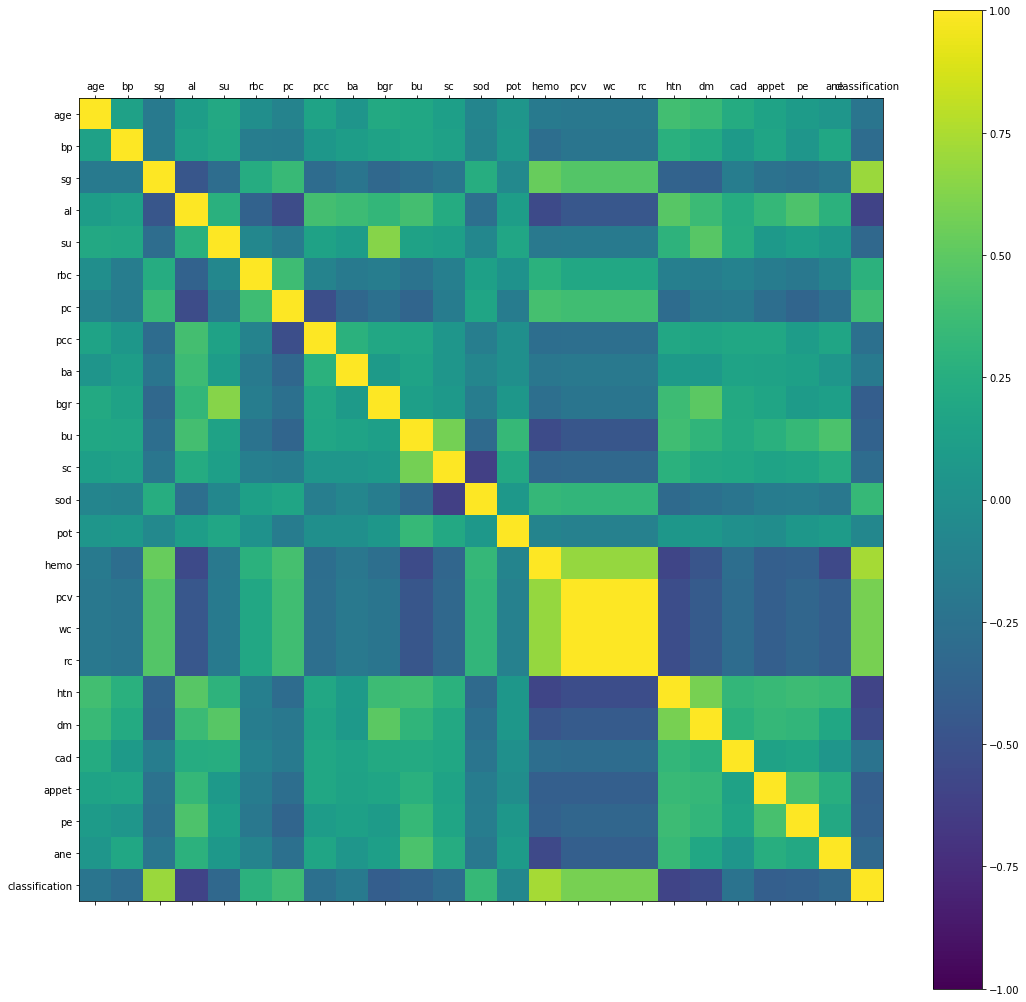

In [67]:
correlations = kidney.corr()
# plot correlation matrix
fig = plt.figure(figsize =(18,18))
names=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,25,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [64]:
x=kidney.drop(['classification'], axis=1)

In [63]:
y=kidney.loc[:,['classification']]

In [72]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train ,y_test =train_test_split(x,y, test_size=0.2, random_state=128)

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 128)
classifier.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=128, verbose=0, warm_start=False)

In [87]:
y_pred_test = classifier.predict(x_test)

In [88]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [94]:
lr_p_train = classifier.predict(x_train)
print(lr_p_train)

[1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[40,  0],
       [ 1, 39]], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,lr_p_train)

1.0

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.98750000000000004

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train

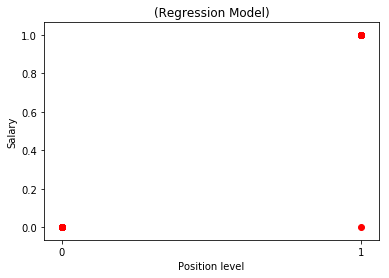

In [112]:
plt.scatter(y_test, y_pred_test, color = 'red')
plt.title('(Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [39]:
#'rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

In [40]:
#re.sub('\s+','',"string")

In [41]:
#kidney['ane'].fillna(value =  kidney['ane'].value_counts(dropna=False).index[0],inplace = True)
#kidney['ane'].value_counts(dropna=False)

In [42]:
#kidney['ane'].value_counts(dropna=False)

In [43]:
#kidney['pc'].value_counts(dropna=False)